<a href="https://colab.research.google.com/github/KV-23/FINANCE_PROJECTS/blob/main/Simple_and_Cumulative_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#THIS prog is fro calculating the daily portfolio returns and other values

In [34]:
!pip install yf
import yfinance as yf

In [35]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [36]:
#Creating an array of stocks for the portfolio
stockSymbols=["META","AMZN","AAPL","NFLX","GOOG"]

In [37]:
stockStartDate='2013-01-01'
today=datetime.today().strftime('%Y-%m-%d')
print(today)

2024-08-11


In [38]:
#Display the number of assets in portfolio
numAssets=len(stockSymbols)
print('You have '+ str(numAssets) +' stocks in your portfolio' )

You have 5 stocks in your portfolio


In [39]:
def getMyPortfolio(stocks=stockSymbols,start=stockStartDate,end=today):
  data_main=yf.download(stocks,start,end)
  data=data_main['Adj Close']
  return data

In [ ]:
my_stocks=getMyPortfolio(stockSymbols)
print(my_stocks)

In [50]:
def showGraph(my_stocks):

  ##TITLE
  title="Porfolio Adj Price history"

  ##Give fig size
  plt.figure(figsize=(12.5,4.5))
  ##Loop through and plot the price
  for c in my_stocks.columns:
    plt.plot(my_stocks[c],label=c)

    plt.title(title)
    plt.ylabel('Adj closing price (in $USD)')
    plt.xlabel('Time')
    plt.legend(my_stocks.columns.values,loc="upper left")
    plt.show

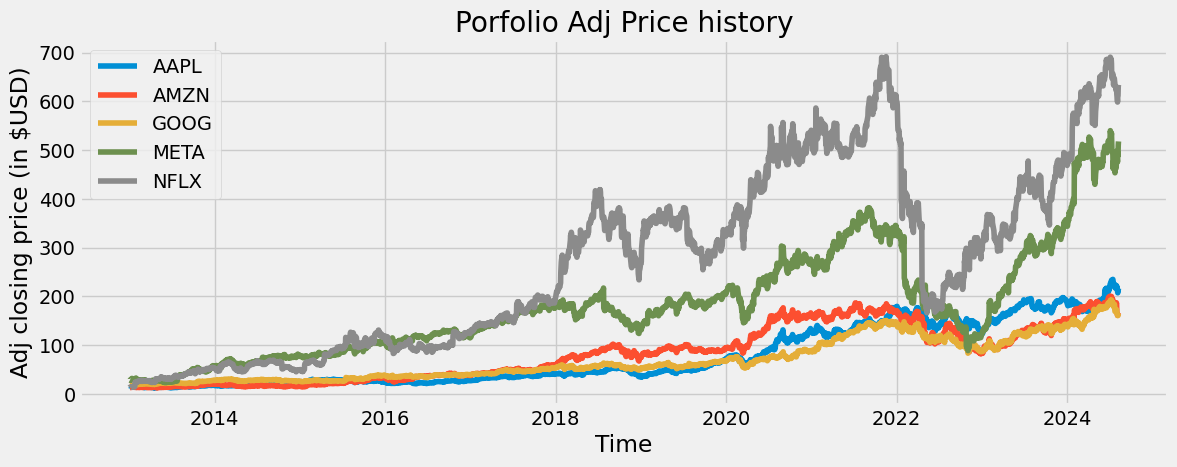

In [51]:
showGraph(my_stocks)

In [ ]:
#Daily returns
daily_simple_returns=my_stocks.pct_change(1)
print(daily_simple_returns)

In [53]:
#showing correlation
daily_simple_returns.corr()

Ticker,AAPL,AMZN,GOOG,META,NFLX
Ticker,,,,,
AAPL,1.000000,0.492036,0.555247,0.464671,0.319037
AMZN,0.492036,1.000000,0.623277,0.548449,0.468250
GOOG,0.555247,0.623277,1.000000,0.581515,0.418184
META,0.464671,0.548449,0.581515,1.000000,0.399321
NFLX,0.319037,0.468250,0.418184,0.399321,1.000000


In [54]:
#covariance matrix for daily returns
daily_simple_returns.cov()

Ticker,AAPL,AMZN,GOOG,META,NFLX
Ticker,,,,,
AAPL,0.000316,0.000179,0.000171,0.000201,0.000165
AMZN,0.000179,0.000417,0.000220,0.000272,0.000278
GOOG,0.000171,0.000220,0.000300,0.000244,0.000211
META,0.000201,0.000272,0.000244,0.000589,0.000282
NFLX,0.000165,0.000278,0.000211,0.000282,0.000847


In [55]:
#variance
daily_simple_returns.var()

,0
Ticker,
AAPL,0.000316
AMZN,0.000417
GOOG,0.000300
META,0.000589
NFLX,0.000847


In [57]:
#stock volatility
print("The stock volatility is : ")
daily_simple_returns.std()

The stock volatility is : 


,0
Ticker,
AAPL,0.017776
AMZN,0.020415
GOOG,0.017312
META,0.024273
NFLX,0.029100


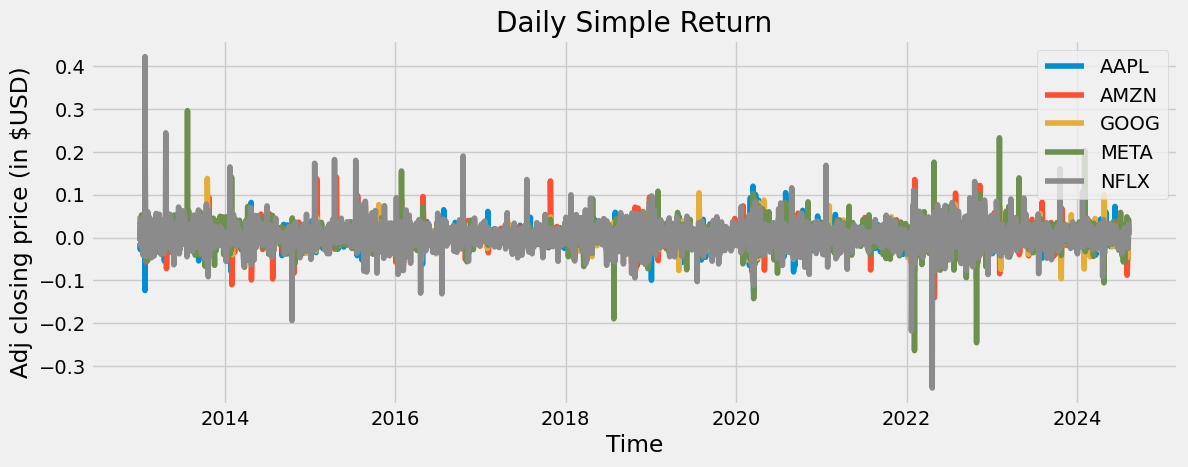

In [60]:
#visualise the daily simple
plt.figure(figsize=(12.5,4.5))
title1='Daily Simple Return'
for c in daily_simple_returns.columns:

  plt.plot(daily_simple_returns[c],label=c)

  plt.title(title1)
  plt.ylabel('Adj closing price (in $USD)')
  plt.xlabel('Time')
  plt.legend(daily_simple_returns.columns.values,loc="upper right")
  plt.show

In [66]:
#mean of daily simple returns
daily_simple_returns_mean=daily_simple_returns.mean()

In [63]:
###If we want random weights
random_weights=np.random.rand(5)
print(random_weights)

[0.1233182  0.73555125 0.74596931 0.40183848 0.66245755]


In [64]:
#Fixed weights
randomWeight=np.array([0.4,.1,.3,.1,.1])

In [70]:
#total portfolio returns
total_returns=np.sum(daily_simple_returns_mean*randomWeight)

print("The expected portfolio value is "+str(total_returns))
print("The expected annualised returns is "+str(total_returns*253))

The expected portfolio value is 0.0010997076862712394
The expected annualised returns is 0.2782260446266236


In [ ]:
dailycumsimplereturns= (daily_simple_returns+1).cumprod()
dailycumsimplereturns

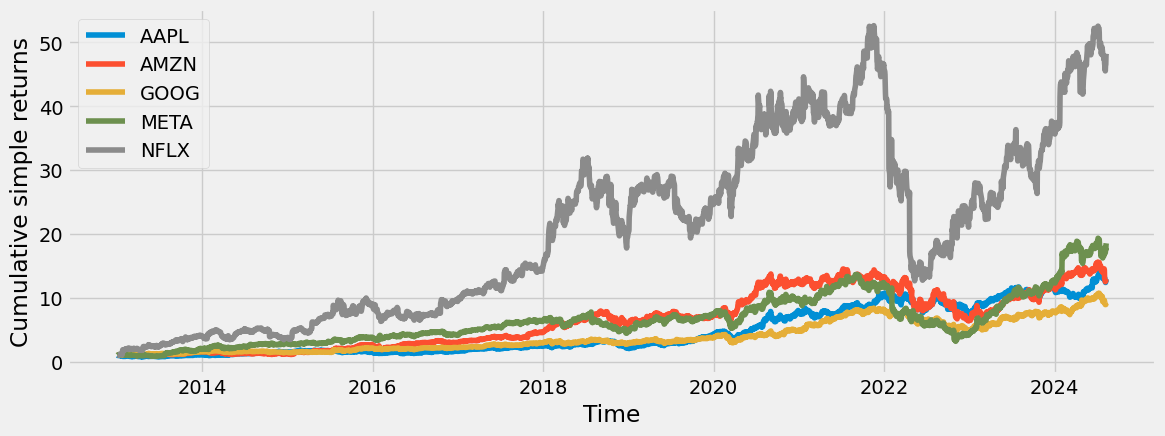

In [77]:
plt.figure(figsize=(12.5,4.5))
title2='Cumulative simple returns'
for c in dailycumsimplereturns.columns:
  plt.plot(dailycumsimplereturns[c],label=c)
plt.xlabel('Time')
plt.ylabel('Cumulative simple returns')
plt.legend(dailycumsimplereturns.columns.values,loc="upper left")
plt.show()